<a href="https://colab.research.google.com/github/virajdesai0309/DWSim-X-NEQSim/blob/main/DWSim_X_NEQSim_Compressor_%26_Turbine(Expander).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compressor Expander Example

##Basis

This notebook demonstrates how to use the compressor/expander unit operation in NEQSim. It simulates a pure component stream of methane. This example is based on a similar simulation in DWSim Process Simulator, where a stream with, a pressure of 101325 Pa, and a flow rate of 1 kg/s is being compressed with an adiabatic efficieny of 75% till 301325 Pa and then decompressed adiabatically till 101235 Pa

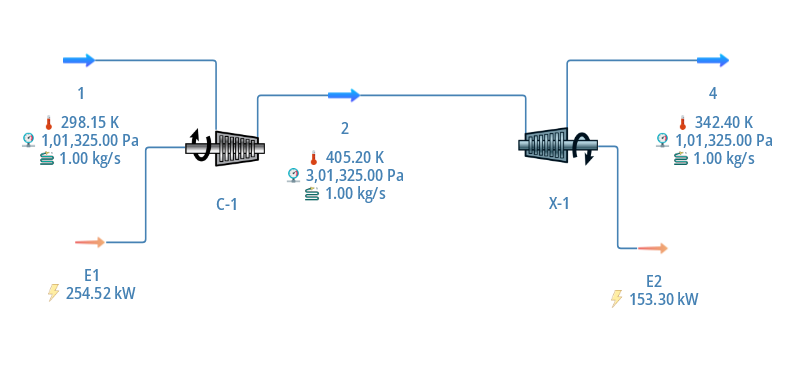

The simulation involves defining the fluid mixture, performing a TPflash for phase equilibrium calculations, setting up the feed stream, configuring the compressor & expander, running the simulation, and retrieving the stream properties.

In [29]:
# Install NEQSim
!pip install neqsim

# Import necessary modules from NEQSim
from neqsim.thermo import fluid, TPflash, printFrame
from neqsim.process import clearProcess, stream, compressor, expander, runProcess

# 1. Define the fluid (methane)
fluid_mix = fluid('naturalgas')  # Use the predefined 'naturalgas' fluid model
fluid_mix.addComponent('methane', 1.0)  # Pure methane
fluid_mix.setMixingRule(2)  # Use the appropriate mixing rule for gas
fluid_mix.setPressure(101325, 'Pa')  # Set initial pressure = 101325 Pa
fluid_mix.setTemperature(298.15, 'K')  # Set initial temperature = 298.15 K
fluid_mix.setTotalFlowRate(3600, 'kg/hr')  # Flow rate = 1 kg/hr

# 2. Perform TPflash for phase equilibrium calculation
TPflash(fluid_mix)

# 3. Set up the initial stream
clearProcess()  # Clear any existing processes
feedStream = stream(fluid_mix)

# 4. Compressor to compress the stream to 301325 Pa (adiabatic efficiency = 75%)
compressor_unit = compressor(feedStream)
compressor_unit.setOutletPressure(301325, 'Pa')  # Desired outlet pressure = 301325 Pa
compressor_unit.setIsentropicEfficiency(0.75)  # Adiabatic efficiency = 75%

# 5. Expander to decompress the stream back to 101325 Pa (isentropic efficiency = 75%)
expander_unit = expander(compressor_unit.getOutStream(), 101325, "Methane Expander")  # Provide outlet pressure and optional name
expander_unit.setIsentropicEfficiency(0.75)  # Isentropic efficiency = 75%

# 6. Run the process simulation
runProcess()

# 7. Retrieve and print compressor outlet stream specs
compressed_stream = compressor_unit.getOutStream()
compressor_duty = compressor_unit.getPower()  # Get compressor duty in watts
print("\n--- Compressed Stream Specs ---")
print(f"Temperature: {compressed_stream.getTemperature()} K")
print(f"Pressure: {compressed_stream.getPressure()} Pa")
print(f"Flow rate: {compressed_stream.getFlowRate('kg/hr')} kg/hr")
print(f"Composition: {compressed_stream.getFluid().getComponentNames()}")
print(f"Compressor Duty: {compressor_duty / 1000:.2f} kW")  # Convert W to kW
printFrame(compressed_stream.getFluid())

# 8. Retrieve and print expander outlet stream specs
expanded_stream = expander_unit.getOutStream()
expander_duty = expander_unit.getPower()  # Get expander duty in watts
print("\n--- Expanded Stream Specs ---")
print(f"Temperature: {expanded_stream.getTemperature()} K")
print(f"Pressure: {expanded_stream.getPressure()} Pa")
print(f"Flow rate: {expanded_stream.getFlowRate('kg/hr')} kg/hr")
print(f"Composition: {expanded_stream.getFluid().getComponentNames()}")
print(f"Expander Duty: {expander_duty / 1000:.2f} kW")  # Convert W to kW
printFrame(expanded_stream.getFluid())


--- Compressed Stream Specs ---
Temperature: 405.1076389092547 K
Pressure: 3.01325 Pa
Flow rate: 3600.0 kg/hr
Composition: ['methane']
Compressor Duty: 254.15 kW
| 0                    | 1         | 2                  | 3   | 4   | 5   | 6               |
|:---------------------|:----------|:-------------------|:----|:----|:----|:----------------|
|                      | total     | GAS                |     |     |     |                 |
| methane              | 1E0       | 1E0                |     |     |     | [mole fraction] |
|                      |           |                    |     |     |     |                 |
| Density              |           | 1.43675E0          |     |     |     | kg/m3           |
| Phase Fraction       |           | 1E0                |     |     |     | [mole fraction] |
| Molar Mass           | 1.6043E-2 | 1.6043E-2          |     |     |     | kg/mol          |
| Z factor             |           | 9.98933E-1         |     |     |     | [-]      

Oberservation so far....

The compressor power calculations are working fine but the same is ***not applied in expander***